<a href="https://colab.research.google.com/github/amirebm/ML-Implementation/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

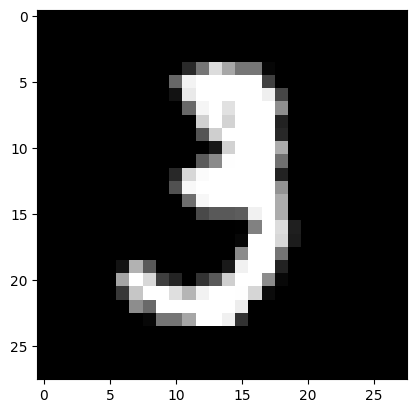

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='gray')
plt.show()


#preproceccing

In [5]:
x_train = x_train.reshape(-1,28,28,1)#mishod bejaye -1, 60000 ro begzarim,
#ama ba -1 khodesh miad hamon 60000 ro dar nazar migire.hamin baraye paeen ham
#dar nazar gerefte mishe.
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
import tensorflow as tf
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,450 (240.04 KB)

 Trainable params: 61,450 (240.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6675 - loss: 1.3611 - val_accuracy: 0.9512 - val_loss: 0.1471
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9566 - loss: 0.1426 - val_accuracy: 0.9613 - val_loss: 0.1207
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9712 - loss: 0.0943 - val_accuracy: 0.9737 - val_loss: 0.0854
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9765 - loss: 0.0741 - val_accuracy: 0.9760 - val_loss: 0.0813
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9820 - loss: 0.0575 - val_accuracy: 0.9741 - val_loss: 0.0910
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0496 - val_accuracy: 0.9801 - val_loss: 0.0699
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9788 - val_loss: 0.0745
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9867 - loss: 0.0403 - val_accuracy:

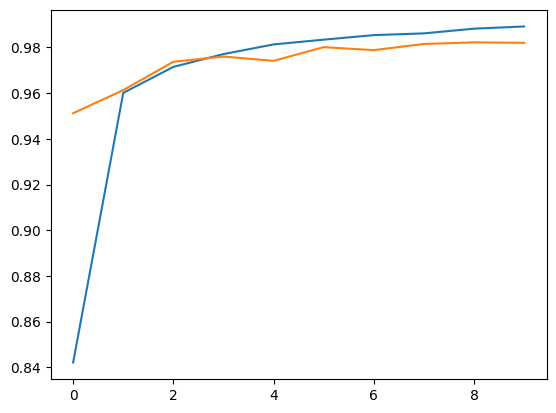

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()